# 여행 상품 신청 여부 예측 경진대회

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [2]:
sns.set_theme(style='white')

In [3]:
os.chdir('C:\\Users\\Jaesu\\github_desktop\\Dacon-Basic\\여행상품-신청여부-예측')

In [4]:
df = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
submission = pd.read_csv('./Data/sample_submission.csv')

|변수 이름|세부 사항|
|:-:|:-:|
|id | 샘플 아이디|
|Age | 나이|
|TypeofContact | 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)|
|CityTier | 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급)| 
|DurationOfPitch | 영업 사원이 고객에게 제공하는 프레젠테이션 기간|
|Occupation | 직업|
|Gender | 성별|
|NumberOfPersonVisiting | 고객과 함께 여행을 계획 중인 총 인원|
|NumberOfFollowups | 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수|
|ProductPitched | 영업 사원이 제시한 상품|
|PreferredPropertyStar | 선호 호텔 숙박업소 등급|
|MaritalStatus | 결혼여부|
|NumberOfTrips | 평균 연간 여행 횟수|
|Passport | 여권 보유 여부 (0: 없음, 1: 있음)|
|PitchSatisfactionScore | 영업 사원의 프레젠테이션 만족도|
|OwnCar | 자동차 보유 여부 (0: 없음, 1: 있음)|
|NumberOfChildrenVisiting | 함께 여행을 계획 중인 5세 미만의 어린이 수|
|Designation | (직업의) 직급|
|MonthlyIncome | 월 급여|
|ProdTaken | 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)|

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [9]:
df.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [8]:
df.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


`-` 시각화를 위해 target의 범주명을 바꾸겠다

In [5]:
df['ProdTaken'] = df['ProdTaken'].map({1:'Apply', 0:'NotApply'})

## EDA

### 범주형 변수 시각화

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

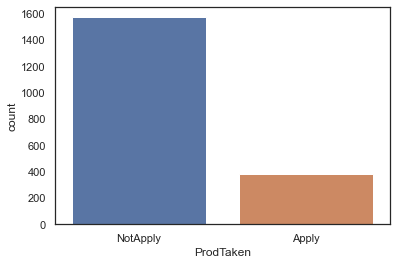

In [22]:
sns.countplot(data=df, x='ProdTaken')

`-` 여행상품을 신청한 사람은 전체의 20%, 신청하지 않은 사람은 전체의 80% 이다

`-` 라벨 불균형이 심하다

`-` 설계한 모델의 정확도는 최소 80%는 넘어야 한다

In [9]:
category_features = ['TypeofContact', 'CityTier', 'Occupation',
                     'Gender', 'NumberOfPersonVisiting',
                     'NumberOfFollowups', 'ProductPitched',
                     'PreferredPropertyStar', 'MaritalStatus',
                     'NumberOfTrips', 'Passport',
                     'PitchSatisfactionScore', 'OwnCar',
                     'NumberOfChildrenVisiting', 'Designation',
                     'ProdTaken']

In [27]:
def show_unique_counts(df_: pd.DataFrame, category_features: list, target: str, row: int, column: int) -> None:
    """ df의 변수 중에서 범주형 변수의 unique한 값의 개수를 시각화하는 함수"""
    df = df_.copy()
    df = df.dropna()  ## 결측치 제거
    df[category_features] = df[category_features].astype('str')  ## 숫자로 코딩된 범주형 변수의 타입을 문자형으로 변경
    fig, axs = plt.subplots(row, column, figsize=(16, 40))  ## figsize는 적절하게 수동으로 조절
    assert row * column >= len(category_features), 'subplot의 개수는 범주형 변수의 개수보다 같거나 많아야 합니다'
    
    for i, feature in enumerate(category_features):
        ax = axs[i // column][i % column]
        gg = sns.histplot(data=df, y=feature, hue=target, multiple='stack', shrink=0.8, discrete=True, ax=ax)
        fig.canvas.draw()
        
        order = [label.get_text() for label in gg.get_yticklabels()]
        max_width = max([p.get_width() for p in gg.patches]) 
        sns.move_legend(gg, 'lower right', title=target)

        for j, p in enumerate(gg.patches):
            try:
                condition = f'{feature} == "{order[j]}"'
                aa = df.query(condition)[target].value_counts()
                text = np.round((100 * aa.to_dict().pop(df[target].sort_values().unique()[1], 0) / sum(aa)), 2) ## text => (Apply) / (Apply + NotApply)
                gg.annotate('{:.2f}%'.format(text), (p.get_width() + 0.05*max_width, p.get_y() + 0.5*p.get_height() + 0.06)) ## text의 위치 조정
            except:
                pass
    
    ## 남는 서브 플랏은 삭제하자
    for ax in axs: ## axs의 row
        for k in range(column): ## axs의 column
            if not ax[k].has_data(): 
                fig.delaxes(ax[k]) ## 남는 서브 플랏이니 삭제한다

    fig.suptitle("Categorical feature's Unique Counts\n\n", x=0.56, fontsize=25) ## default: x=0.5, y=0.98
    fig.tight_layout()

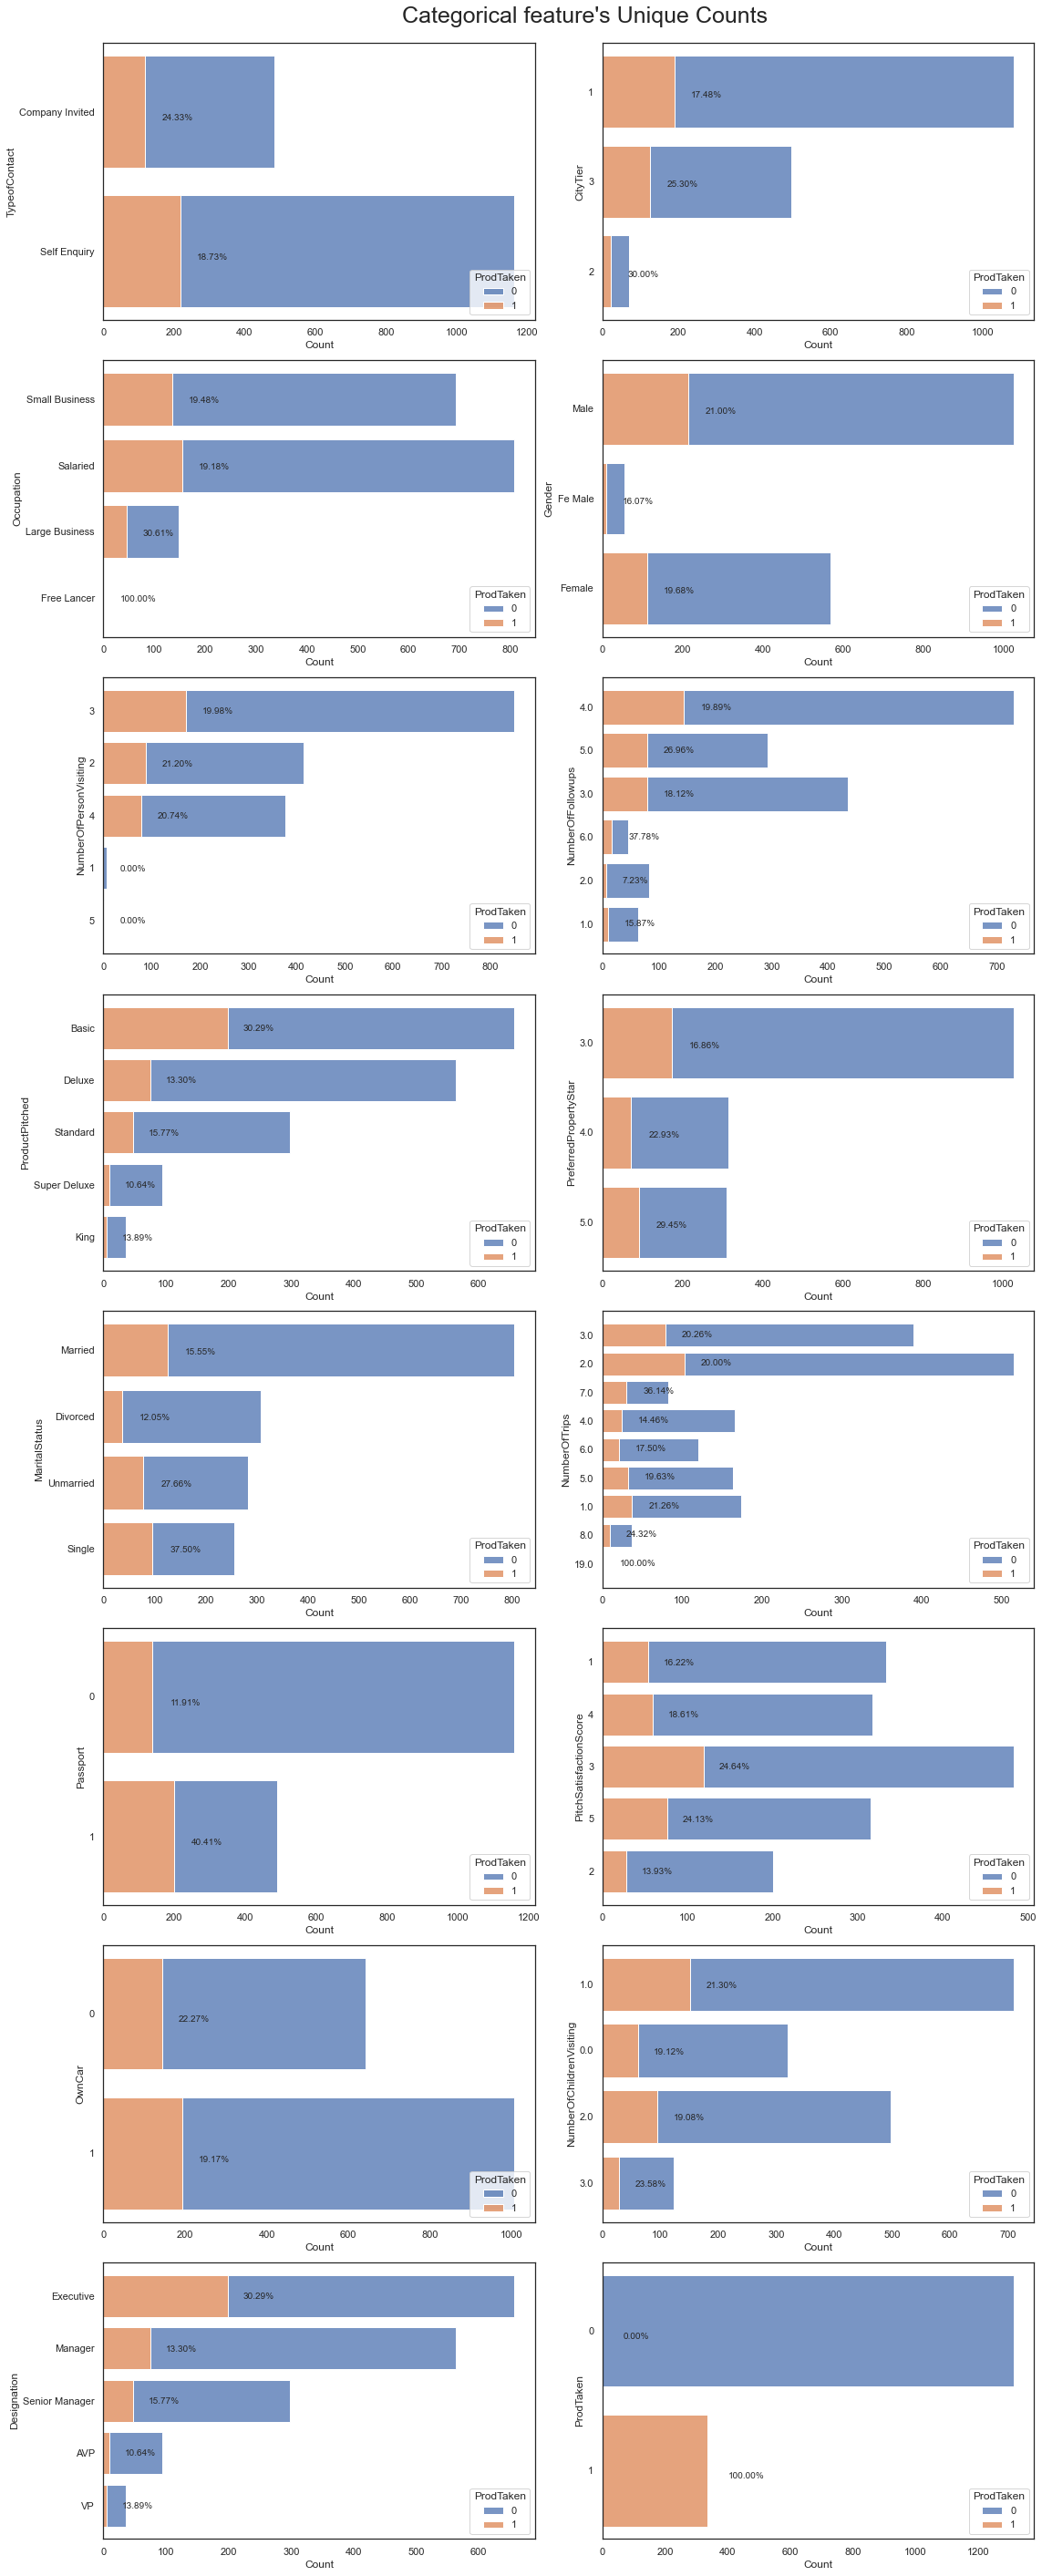

In [28]:
show_unique_counts(df, category_features, 'ProdTaken', row=8, column=2)

`-` 직급은 미국 회사 직급 체계를 따름

`-` Executive -> Manager -> Senior Manager -> VP -> AVP (아닐 수 있음)

`-` 클래스별 가장 두드러지는 차이를 보이는 변수는 여권 유무이다

`-` 매우 적은 빈도를 가지는 범주는 다른 범주로 포함시키자

### 양적 변수 시각화

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

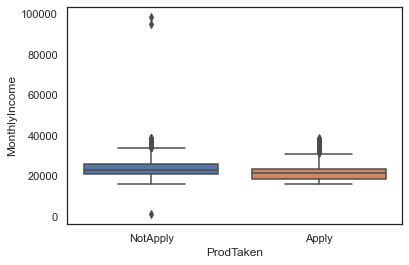

In [81]:
sns.boxplot(data=df, y='MonthlyIncome', x='ProdTaken')

<AxesSubplot:xlabel='Designation', ylabel='MonthlyIncome'>

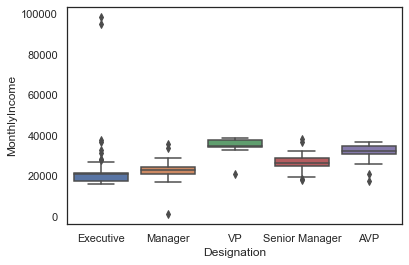

In [91]:
sns.boxplot(data=df, y='MonthlyIncome', x='Designation')

`-` 여행상품을 신청하는 사람들은 그렇지 않은 사람보다 평균적으로 급여가 더 적다 (하지만 거의 차이가 없다)

`-` 결측치는 직급의 중앙값으로 채우면 될 듯하다 (직업에 따른 평균적인 급여 차이는 없었다)

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

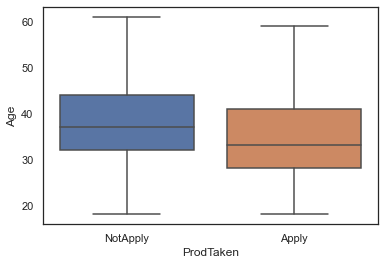

In [84]:
sns.boxplot(data=df, y='Age', x='ProdTaken')

`-` 여행상품을 신청하는 사람들은 그렇지 않은 사람보다 평균적으로 더 젊다

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

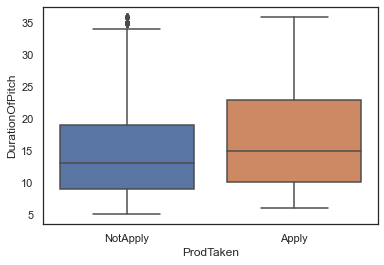

In [85]:
sns.boxplot(data=df, y='DurationOfPitch', x='ProdTaken')

`-` 여행상품을 신청하는 사람들은 그렇지 않은 사람보다 평균적으로 제공받은 프레젠테이션 기간이 더 길다

## 모델링

In [17]:
from sklearn.model_selection import StratifiedKFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [21]:
import optuna
from optuna import Trial
from optuna.samplers import TPESampler

In [18]:
## accuracy 계산
def accuracy(true, pred):
    return sum(true == pred) / len(true)

In [31]:
def OOF_predict(model, X, y, test, skfold, threshold=0.5, return_prob=False):
    """
    Out-Of-Fold 방식을 통해 test(binary category)를 예측
    train, valid에 대한 accuracy와 예측한 test를 return
    """ 
    model_train_score = []
    model_valid_score = []
    model_prob = np.zeros(shape=(test.shape[0], len(y.unique())))

    for i, (train_idx, valid_idx) in enumerate(SKfold.split(X, y)):
        # print(f'({i + 1} / {SKfold.n_splits}) Fold Training......')
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_valid, y_valid = X.iloc[valid_idx], y.iloc[valid_idx]
        
        ## 모델 적합
        model.fit(X_train, y_train)
        
        ## prediction(각 클래스별 확률을 구함)
        train_prob = model.predict(X_train)  ## train
        valid_prob = model.predict_proba(X_valid)  ## valid
        test_prob = model.predict_proba(test)  ## test
        
        ## 1번째 컬럼(1일 확률)의 값이 threshold보다 크면 1 아니면 0으로 계산
        train_pred = (train_prob[:, 1] > threshold).astype(int) 
        valid_pred = (valid_prob[:, 1] > threshold).astype(int) 
        
        model_train_score.append(accuracy(y_train, train_pred)) ## train accuracy
        model_valid_score.append(accuracy(y_valid, valid_pred)) ## valid accuracy
        model_prob += test_prob / skfold.n_splits ## test 라벨 예측 확률(k Fold)
        
    ## test
    model_pred = (model_prob[:, 1] > threshold).astype(int) 
    if return_prob:
        return model_train_score, model_valid_score, model_prob
    return model_train_score, model_valid_score, model_pred

In [32]:
def OOF_ensemble_model(model_list, X, y, test, SKfold, stratify):
    """
    모델을 OOF 앙상블하여 test(numeric)를 예측
    예측한 test를 return
    """
    test_ensemble_pred = np.zeros(shape=(test.shape[0]))
    for model in tqdm(model_list):
        _, _, test_pred = OOF_predict(model, X, y, test, SKfold, stratify)
        test_ensemble_pred += test_pred / len(model_list)
    return test_ensemble_pred

In [30]:
features = [
            'id',
            'Age', 
            'TypeofContact',
            'CityTier',
            'DurationOfPitch',
            'Occupation',
            'Gender', 
            'NumberOfPersonVisiting',
            'NumberOfFollowups',
            'ProductPitched',
            'PreferredPropertyStar',
            'MaritalStatus',
            'NumberOfTrips',
            'Passport',
            'PitchSatisfactionScore', 
            'OwnCar',
            'NumberOfChildrenVisiting', 
            'Designation', 
            'MonthlyIncome'
           ]

interaction_features = []

In [ ]:
k = 5
skfold1 = StratifiedKFold(k, shuffle=True, random_state=SEED)
skfold2 = StratifiedKFold(k, shuffle=True, random_state=SEED*2)

In [ ]:
df2 = df[features]
test2 = test[features]
target = df['ProdTaken']

In [ ]:
RF = RandomForestRegressor(n_estimators=500,
                           max_depth=16,
                           min_samples_split=2,
                           random_state=SEED)

EXT = ExtraTreesRegressor(n_estimators=500,
                          max_depth=15,
                          min_samples_split=2,
                          random_state=SEED)

GD = GradientBoostingRegressor(n_estimators=700,
                               learning_rate=0.03,
                               max_depth=6,
                               min_samples_split=3,
                               random_state=SEED)

CB = CatBoostRegressor(n_estimators=1000,
                       learning_rate=0.05,
                       max_depth=6,
                       random_state=SEED,
                       verbose=0)

XGB = XGBRegressor(n_estimators=550,
                   learning_rate=0.05,
                   max_depth=6,
                   random_state=SEED)

In [ ]:
_, LGBM_valid_ACC1, LGBM_test_pred1 = OOF_predict(LGBM, df2, target, test2, skfold1, threshold=0.5)
_, LGBM_valid_ACC2, LGBM_test_pred2 = OOF_predict(LGBM, df2, target, test2, skfold2, threshold=0.5)

In [ ]:
print(f'LGBM 모델의 평균과 표준편차: {np.mean(LGBM_valid_ACC1 + LGBM_valid_ACC2)}, {np.std(LGBM_valid_ACC1 + LGBM_valid_ACC2)}') 

- 하이퍼파라미터 튜닝

In [23]:
def lgbm_objective(trial: Trial) -> float:
    score_list = []
    params_lgbm = {
        'random_state': SEED,
        'verbosity': -1,
        'learning_rate': 0.05,
        'n_estimators': 5000,
        'objective': 'binary',
        'metric': 'binary_logloss',
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 3e-5),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 9e-2),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 300),
        'max_bin': trial.suggest_int('max_bin', 200, 500),
    }

    for i, (train_idx, valid_idx) in enumerate(skfold.split(df2, target)):            
        X_train, y_train = df2.iloc[train_idx], target[train_idx]
        X_valid, y_valid = df2.iloc[valid_idx], target[valid_idx]

        LGBM = LGBMClassifier(**params_lgbm)    
        LGBM.fit(
            X_train,
            y_train,
            eval_set=[(X_valid, y_valid)],
            early_stopping_rounds=50,
            verbose=False
        )

        lgbm_pred = LGBM.predict_proba(X_valid)
        logloss_score = log_loss(y_valid, lgbm_pred)
        score_list.append(logloss_score)
    
    return np.mean(score_list)

In [ ]:
sampler = TPESampler(seed=SEED)
study = optuna.create_study(
    study_name='lgbm_parameter_opt',
    direction='minimize',
    sampler=sampler,
)

study.optimize(lgbm_objective, n_trials=50)
print('Best Score:', study.best_value)
print('Best trial:', study.best_trial.params)

In [ ]:
best_params = study.best_params
best_params['learning_rate'] = 0.05
best_params['n_estimators'] = 5000
best_params['random_state'] = SEED

In [ ]:
LGBM = LGBMClassifier(**best_params)

In [22]:
def objective(trial: Trial) -> float:
    param = {
      'random_state':42,
      'learning_rate' : trial.suggest_loguniform('learning_rate', 0.01, 0.3),
      'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
      'n_estimators':trial.suggest_int('n_estimators', 1000, 10000),
      'max_depth':trial.suggest_int('max_depth', 4, 16),
      'random_strength' :trial.suggest_int('random_strength', 0, 100),
      'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0),
      'l2_leaf_reg':trial.suggest_float('l2_leaf_reg',1e-8,3e-5),
      'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
      'max_bin': trial.suggest_int('max_bin', 200, 500),
      'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
    }

    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2)

    cat_features =[0,1,2,5,6,7,8,15,18]
    cat = CatBoostClassifier(**param)
    cat.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],
          early_stopping_rounds=35,cat_features=cat_features,
          verbose=100)
    cat_pred = cat.predict_proba(X_valid)
    log_score = log_loss(y_valid, cat_pred)

    return log_score